<a href="https://colab.research.google.com/github/mjcho1/Android_2020/blob/master/K_Beauty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)
import io

#from google.colab import files
#uploaded = files.upload()

df_raw = pd.read_csv('국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200309020819.csv', encoding='cp949')
# 데이터 세트 로드
#df_raw = pd.read_csv(io.BytesIO(uploaded['국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200309020819.csv']),encoding='cp949')
df_raw.head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,450568,511395,494391,560853,726741,768504,574551,749612,858240,828752,893026,917330,964762,1244311,1338103,1517805,1860640
1,합계,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,610257,441096,610630,677884,665613,725319,761836,766783,1070693,1157158,1336372,1645003
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,158247,133455,138982,180356,163139,167707,155494,197979,173618,180945,181433,215637
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,4048,4211,3693,3160,3270,2610,2043,2018,2158,2042,1485,1554,1791,1656,1530,1438,1571
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,5,3,5,1,2,6,1,0,2,0,1,70


In [2]:
import os
os.name

'posix'

In [0]:
#if os.name == "posix":
    #sns.set(font="AppleGothic")
#elif os.name == "nt":
    #sns.set(font="Malgun Gothic")

In [0]:
# 폰트 주변이 흐릿하게 보이는 것을 방지. 레티나 설정
%config InlineBackend.figure_format = 'retina'

In [5]:
df_raw.shape

(450, 27)

In [6]:
df_raw["국가(대륙)별"].value_counts()

일본            45
대양주           45
EU            45
합계            45
미국            45
아세안(ASEAN)    45
중남미           45
중국            45
중동            45
기타            45
Name: 국가(대륙)별, dtype: int64

In [7]:
# 미국의 데이터만 살펴보기
df_raw[df_raw["국가(대륙)별"]=="미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,37392,38179,36831,35290,44421,45169,40976,41927,53209,41204,39108,36536,47981,39995,43443,53852,51478
46,미국,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,8160,9183,9469,12177,5184,3603,2317,2071,2657,2951,1818,1483
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,37009,31793,32458,41032,36020,35505,34219,45910,37338,40492,52034,49995
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,2362,2533,2121,1704,1531,1054,946,791,854,696,567,773,854,621,646,934,802
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,0,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,1054,946,791,854,696,567,773,854,621,646,934,802
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,3286,3571,2921,2744,3354,2730,2425,2575,2394,1737,1716,1723,1886,1845,1837,3166,1778
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,18,23,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,2712,2402,2546,2362,1672,1678,1651,1834,1779,1721,3059,1729
54,미국,소프트웨어,계,47,57,49,128,182,113,163,116,147,103,82,83,67,45,37,125,175,251,172,269,88,156,118,338


In [0]:
# 데이터 전처리 - tidy data 만들기
# tidy data, df.melf()
# melt : 행에 있는 데이터를 열로 옮기는 것
df_raw.melt?

In [9]:
df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"])

,국가(대륙)별,상품군별,판매유형별,variable,value
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531
10797,기타,기 타,계,2019 4/4 p),1094
10798,기타,기 타,면세점,2019 4/4 p),1


In [10]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="백만원")
df.shape

(10800, 5)

In [11]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
국가(대륙)별    10800 non-null object
상품군별       10800 non-null object
판매유형별      10800 non-null object
기간         10800 non-null object
백만원        10800 non-null object
dtypes: object(5)
memory usage: 422.0+ KB


In [13]:
# 데이터 전처리 - 문자열 분리하고 데이터 타입 변경하기
# split, map(), lambda 함수
# replace, astype()
# 기간에서 연도 분리하기
df["기간"]

0           2014 1/4
1           2014 1/4
2           2014 1/4
3           2014 1/4
4           2014 1/4
            ...     
10795    2019 4/4 p)
10796    2019 4/4 p)
10797    2019 4/4 p)
10798    2019 4/4 p)
10799    2019 4/4 p)
Name: 기간, Length: 10800, dtype: object

In [14]:
"2019 4/4 p)".split()

['2019', '4/4', 'p)']

In [15]:
"2019 4/4 p)".split()[0]

'2019'

In [16]:
type("2019 4/4 p)".split()[0])

str

In [17]:
int("2019 4/4 p)".split()[0])

2019

In [0]:
df["기간"].map?

In [19]:
df["기간"].map(lambda x:int(x.split()[0]))

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
10795    2019
10796    2019
10797    2019
10798    2019
10799    2019
Name: 기간, Length: 10800, dtype: int64

In [20]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [21]:
"2019 4/4 p)".split()[1]

'4/4'

In [22]:
"2019 4/4 p)".split()[1].split("/")

['4', '4']

In [23]:
"2019 4/4 p)".split()[1].split("/")[0]

'4'

In [24]:
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


In [25]:
# 금액을 수치 데이터로 표현하기 위해 데이터 타입 변경
df["백만원"].replace("-", pd.np.nan)

0        148272
1           NaN
2           NaN
3          4915
4           NaN
          ...  
10795         0
10796       531
10797      1094
10798         1
10799      1093
Name: 백만원, Length: 10800, dtype: object

In [26]:
df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)
df["백만원"]

0        148272.0
1             NaN
2             NaN
3          4915.0
4             NaN
           ...   
10795         0.0
10796       531.0
10797      1094.0
10798         1.0
10799      1093.0
Name: 백만원, Length: 10800, dtype: float64

In [27]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
국가(대륙)별    10800 non-null object
상품군별       10800 non-null object
판매유형별      10800 non-null object
기간         10800 non-null object
백만원        7200 non-null float64
연도         10800 non-null int64
분기         10800 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


In [29]:
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531.0,2019,4
10797,기타,기 타,계,2019 4/4 p),1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4 p),1.0,2019,4


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
국가(대륙)별    9072 non-null object
상품군별       9072 non-null object
판매유형별      9072 non-null object
기간         9072 non-null object
백만원        6048 non-null float64
연도         9072 non-null int64
분기         9072 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [31]:
# 결측치 개수 확인
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

In [0]:
# 전체 상품군별 데이터로 연도별 증가추세 시각화 하기
# 상품군별 판매량 데이터를 시각화
# sns.lineplot()/sns.replot()
# plt.legend()

In [33]:
# 전체 상품군 판매액 시각화
# NaN 제거
# "판매유형별"이 "계"인 데이터를 가져오기
df_total = df[df["판매유형별"]=="계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


In [0]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 

#platform.system()
rc('font', family='NanumBarunGothic')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


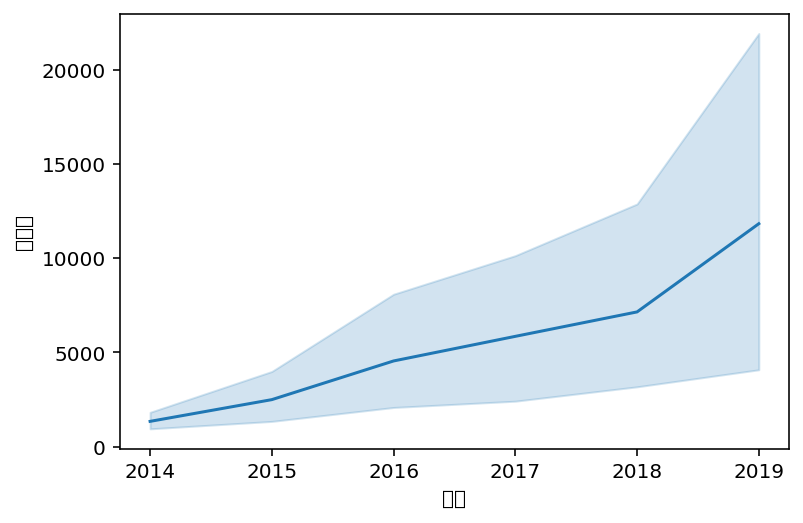

In [35]:
sns.lineplot(data=df_total, x="연도", y="백만원")

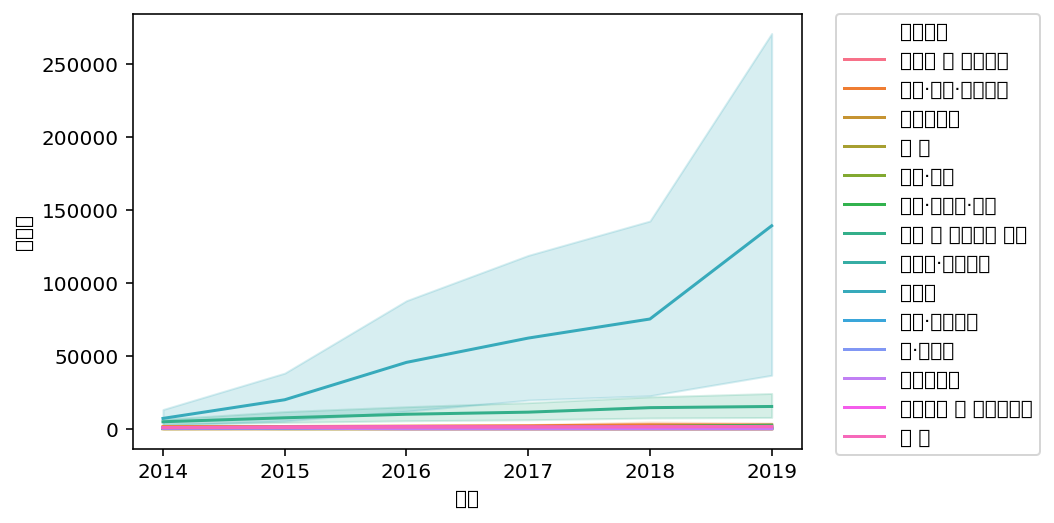

In [36]:
sns.lineplot(data = df_total, x="연도", y="백만원", hue="상품군별")
# legend 값을 밖에 표시
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

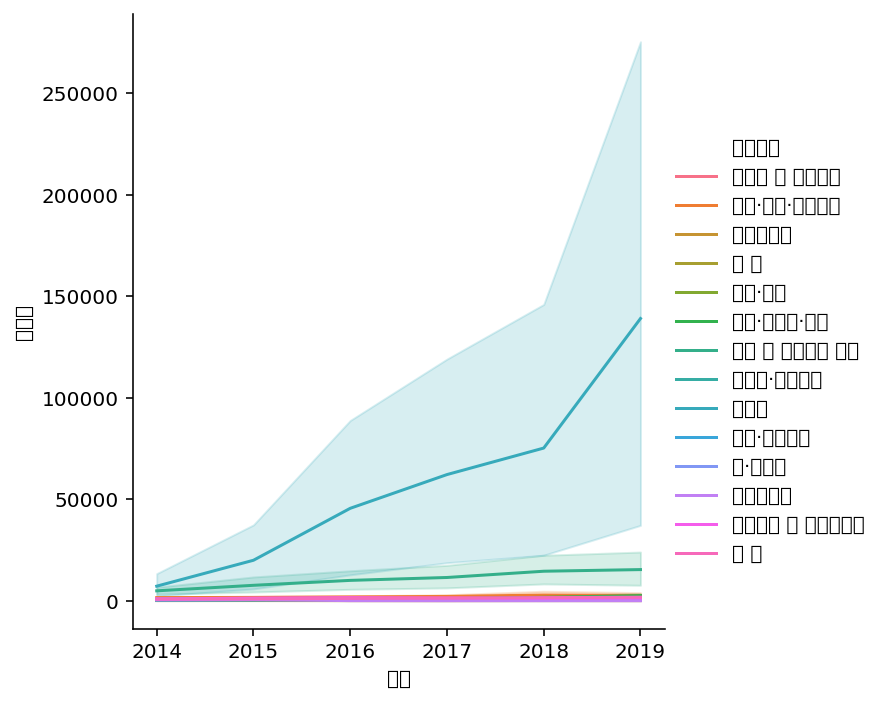

In [37]:
sns.relplot(data=df_total,x="연도",y="백만원",hue="상품군별",kind="line")

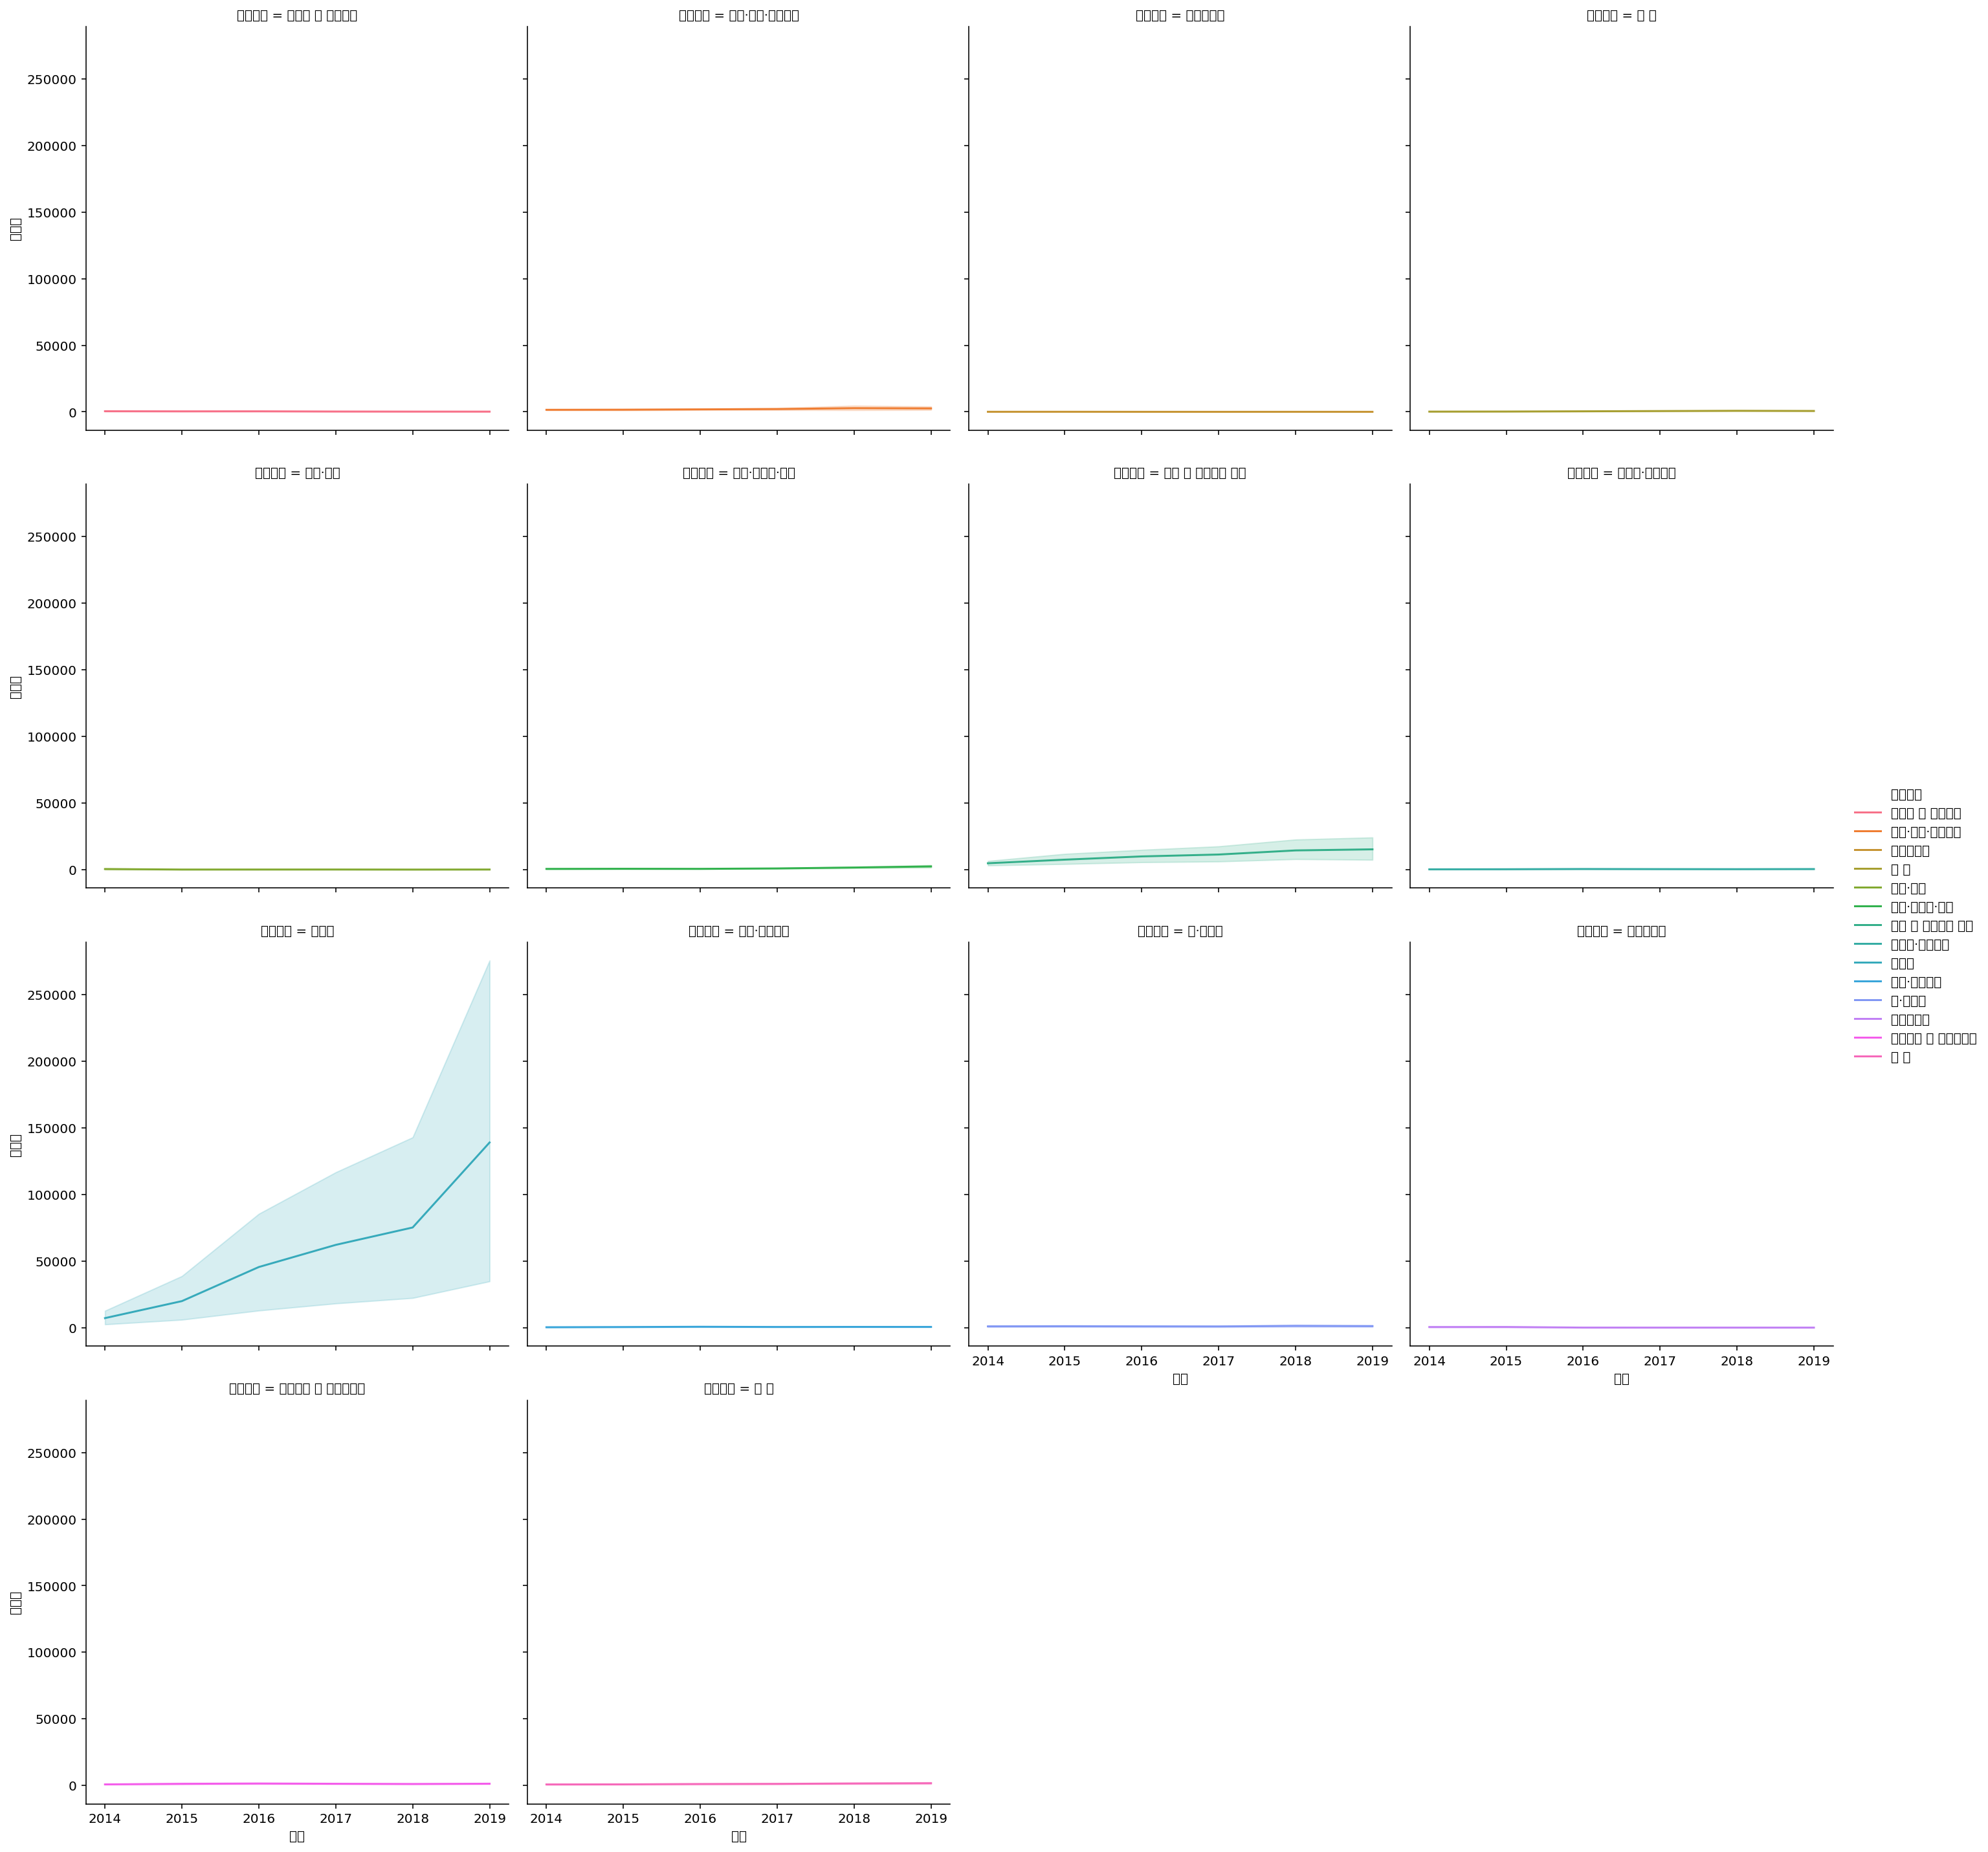

In [38]:
# col_wrap 한 행에 4개를 표시
# col 상품군별로 색상을 다르게
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [39]:
# "화장품" 인 데이터만 뺴고 df_sub 변수에 담기
df_sub = df_total[~df_total["상품군별"].isin(["화장품"])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4 p),192.0,2019,4
10788,기타,음·식료품,계,2019 4/4 p),315.0,2019,4
10791,기타,농축수산물,계,2019 4/4 p),2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4 p),531.0,2019,4


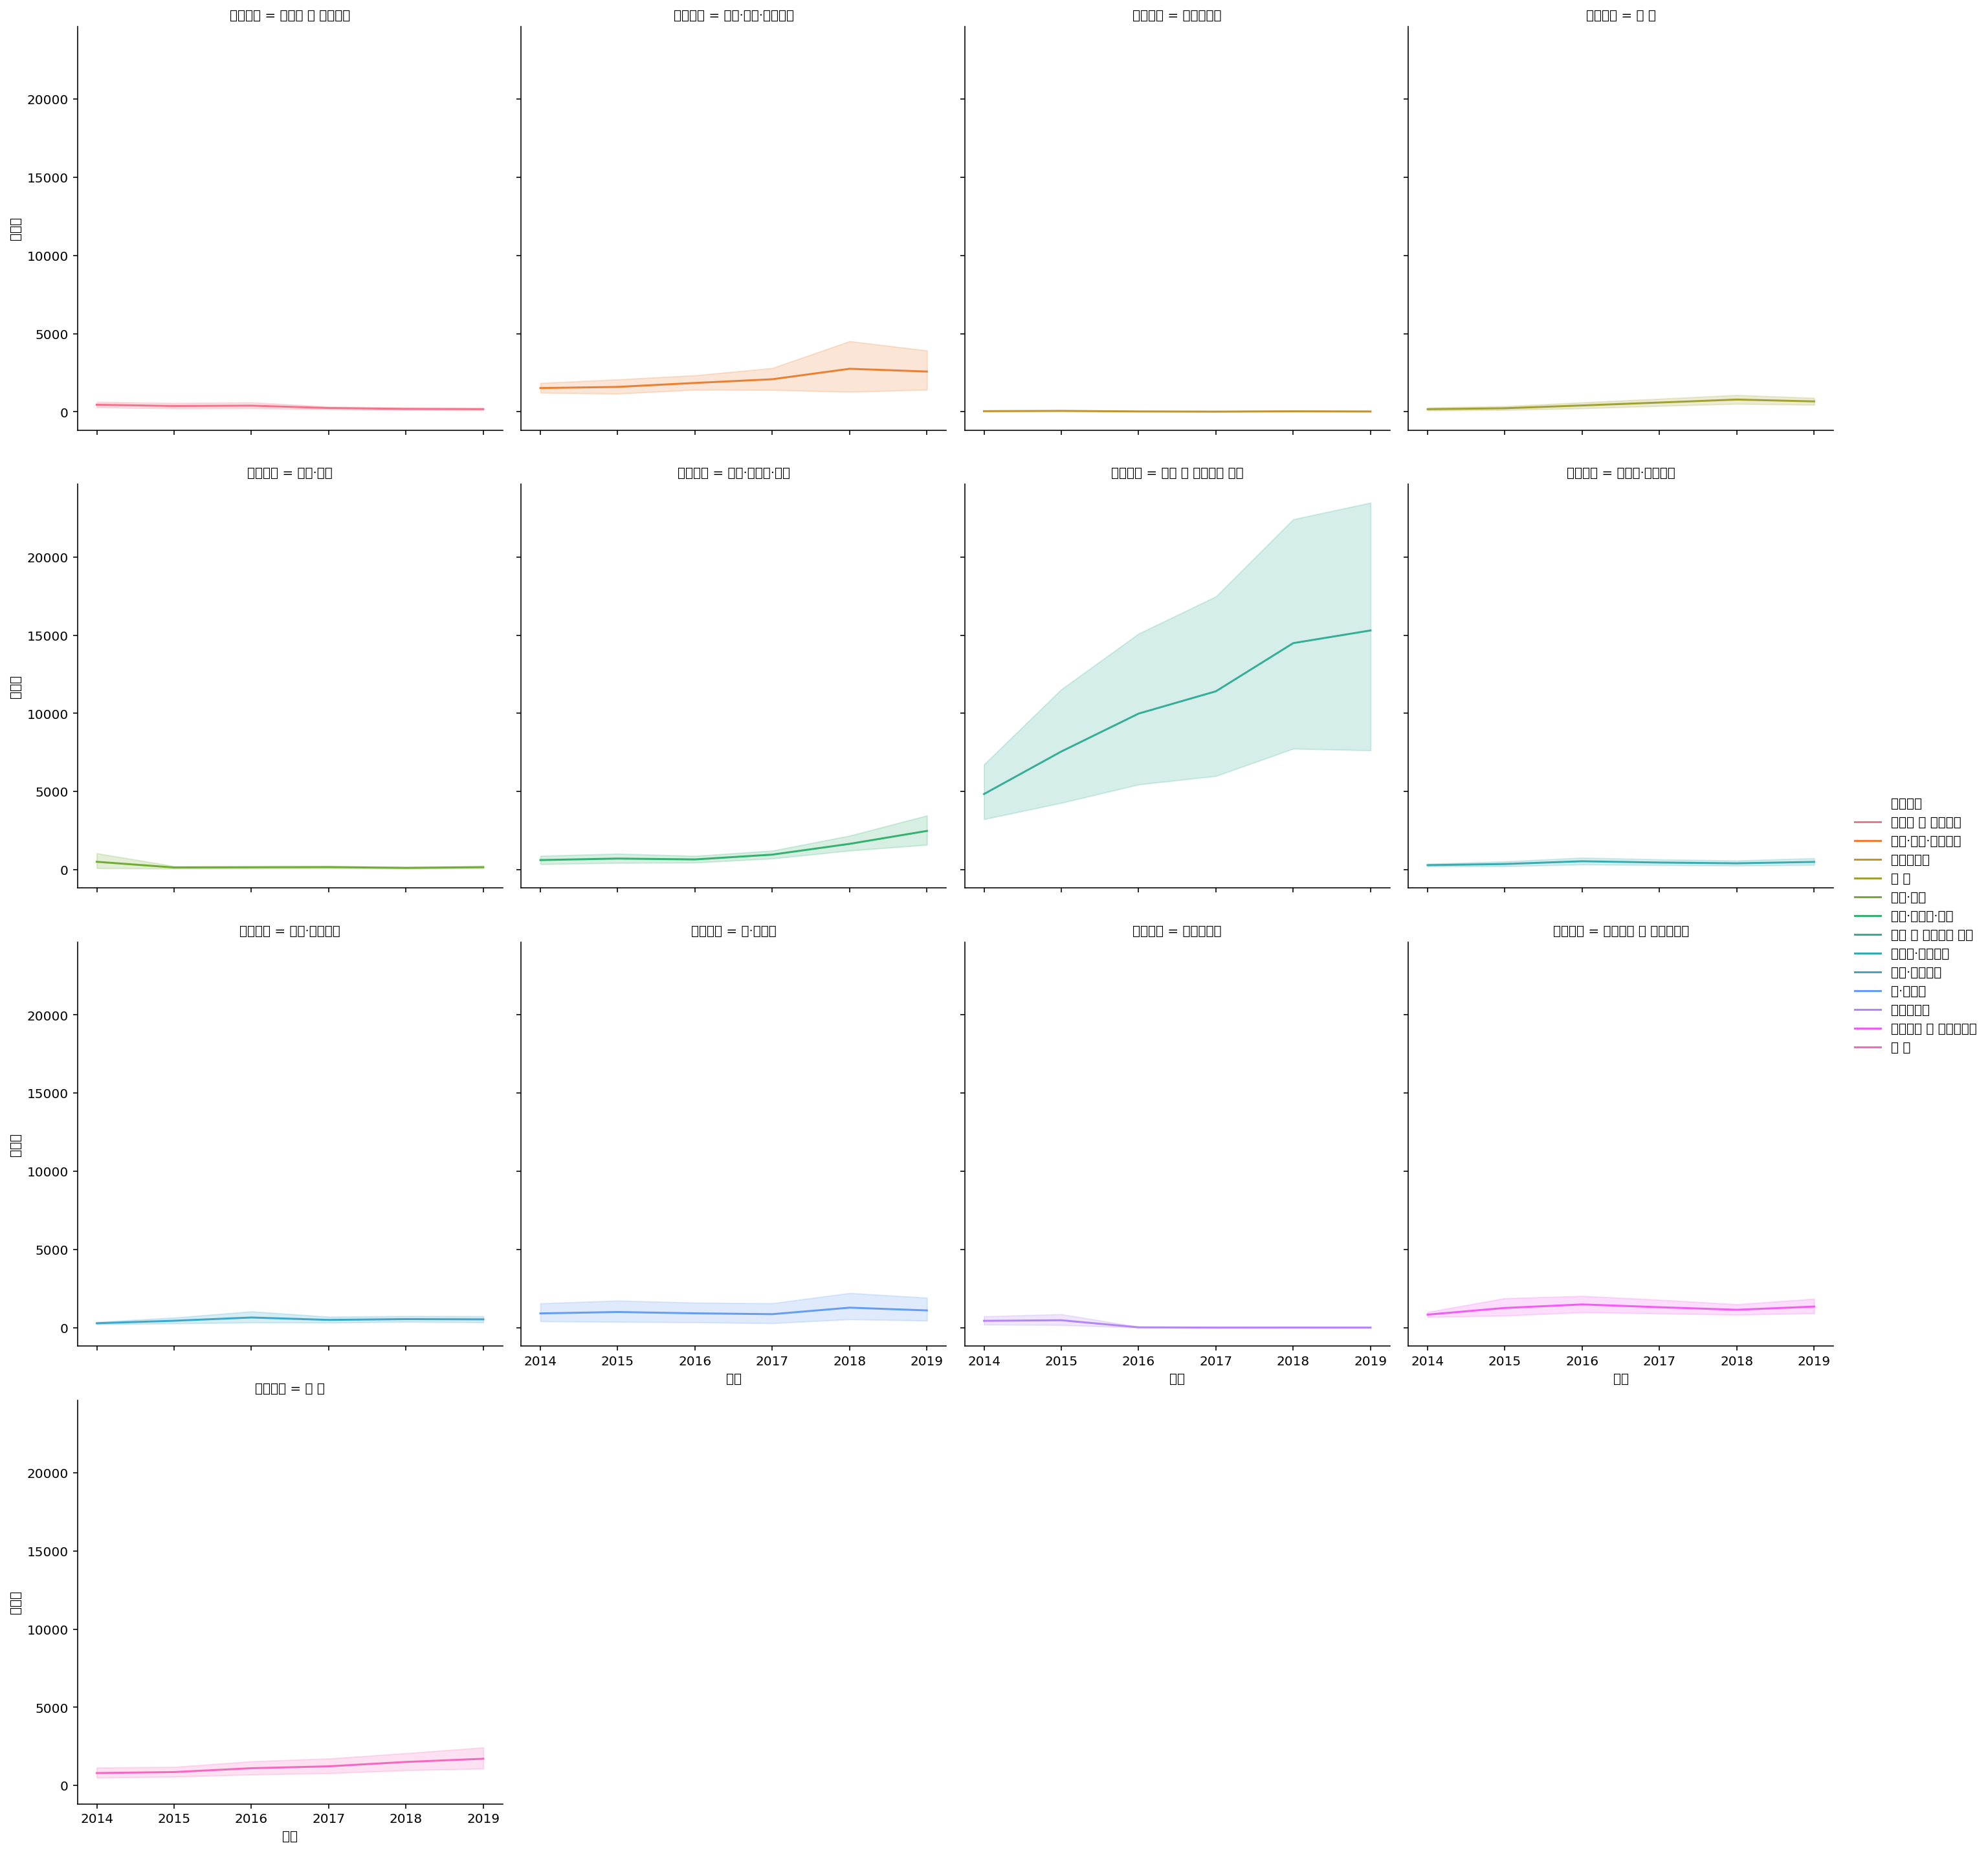

In [40]:
# kind 의 기본값이 scatter 이므로 line 으롤  바꿔줌
sns.relplot(data=df_sub,x="연도",y="백만원",hue="상품군별",col="상품군별",col_wrap=4,kind="line")

In [41]:
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션관련 상품"])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4 p),192.0,2019,4
10788,기타,음·식료품,계,2019 4/4 p),315.0,2019,4
10791,기타,농축수산물,계,2019 4/4 p),2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4 p),531.0,2019,4


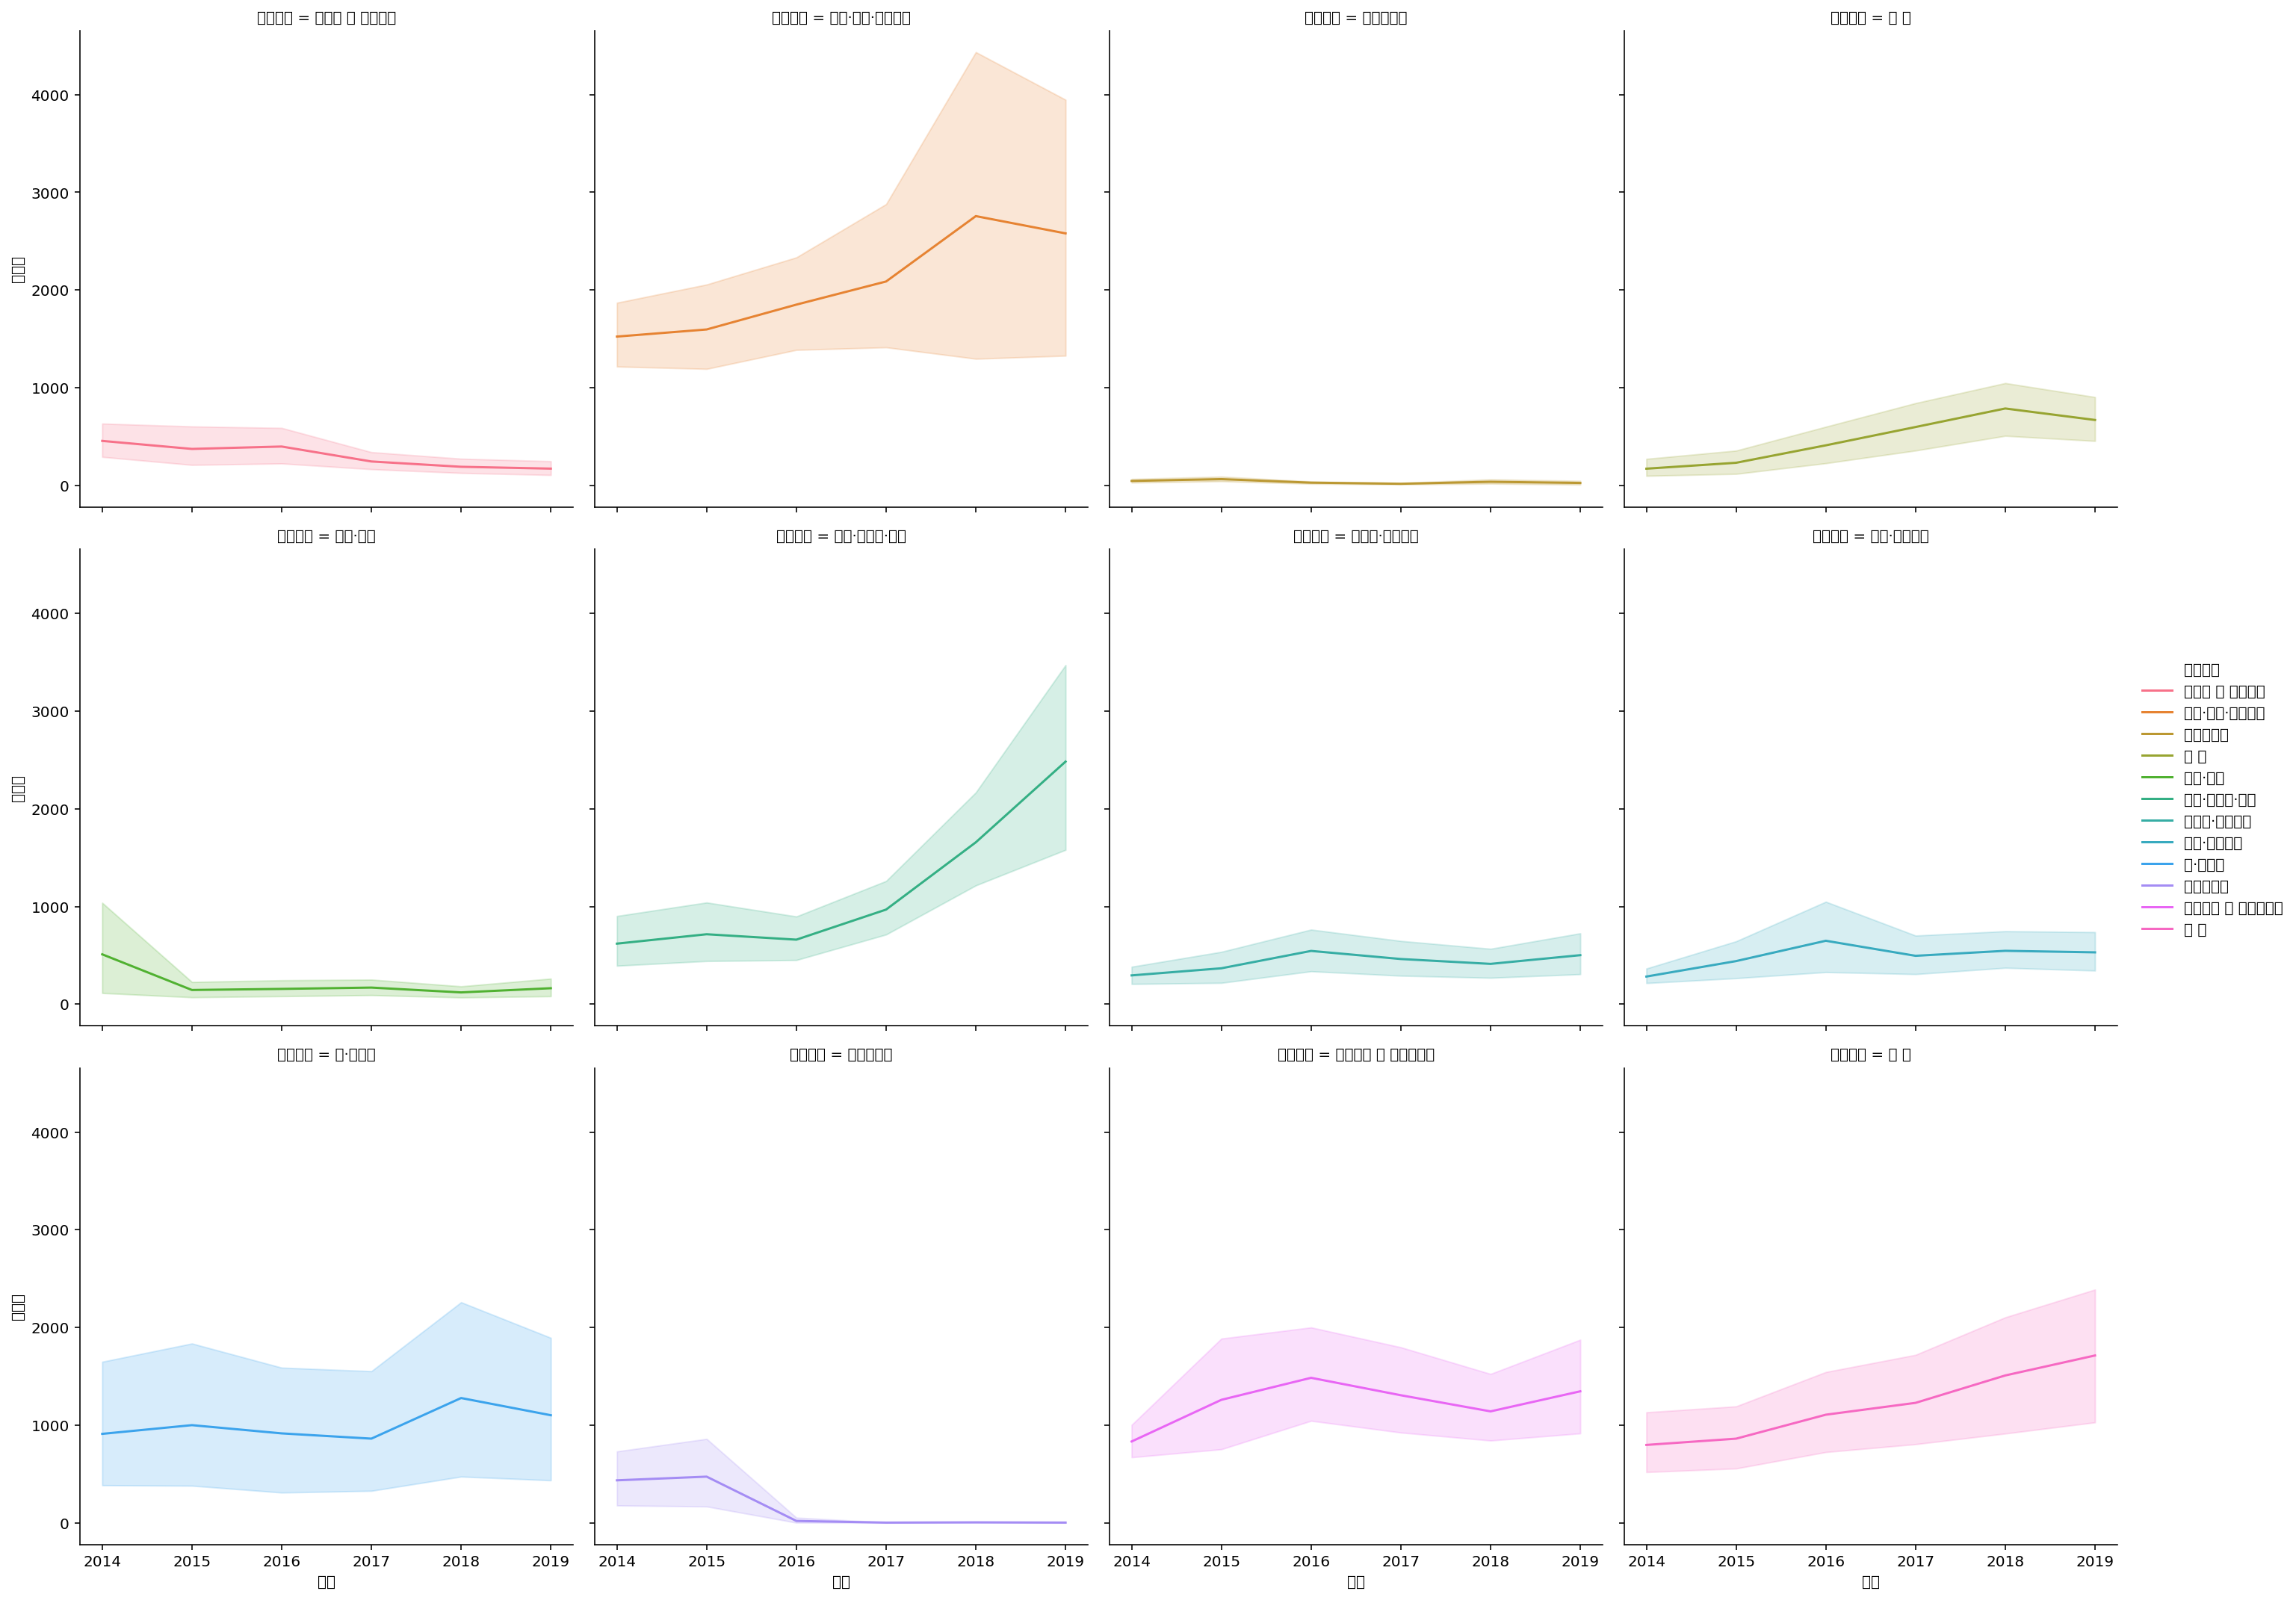

In [42]:
sns.relplot(data=df_sub,x="연도",y="백만원",hue="상품군별",col="상품군별",col_wrap=4,kind="line")

In [43]:
# 화장품 해외 판매액 시각화
# sns.lineplot()
# plt.figure(), plt.xticks()
df_total["상품군별"] == "화장품"

48       False
51       False
54       False
57       False
60       False
         ...  
10785    False
10788    False
10791    False
10794    False
10797    False
Name: 상품군별, Length: 3024, dtype: bool

In [44]:
# 상품군별이 화장품인 데이터를 가져오기
# copy()로 복사하지 않으면 원본 데이터에 영향을 미칠 수 있음
df_cosmetic = df_total[df_total["상품군별"]=="화장품"].copy()
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,EU,화장품,계,2014 1/4,937.0,2014,1
...,...,...,...,...,...,...,...
10602,EU,화장품,계,2019 4/4 p),3904.0,2019,4
10647,중동,화장품,계,2019 4/4 p),1129.0,2019,4
10692,중남미,화장품,계,2019 4/4 p),636.0,2019,4
10737,대양주,화장품,계,2019 4/4 p),1084.0,2019,4


In [45]:
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

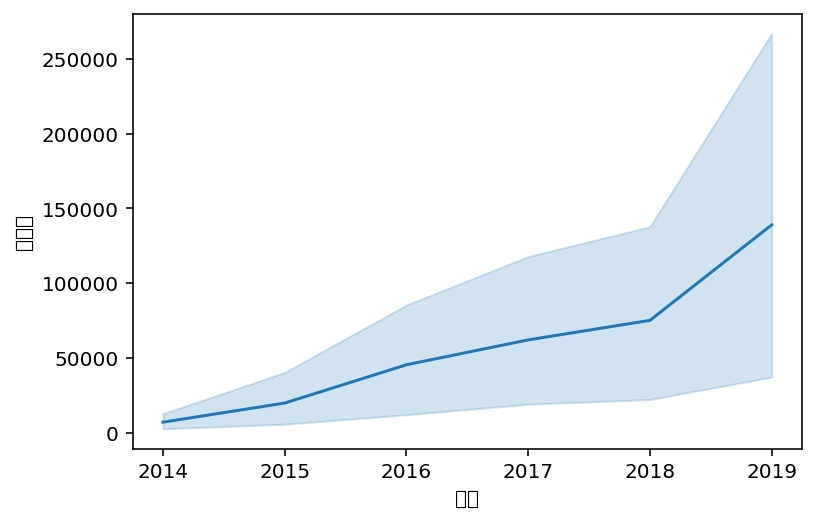

In [46]:
sns.lineplot(data=df_cosmetic, x="연도", y="백만원")

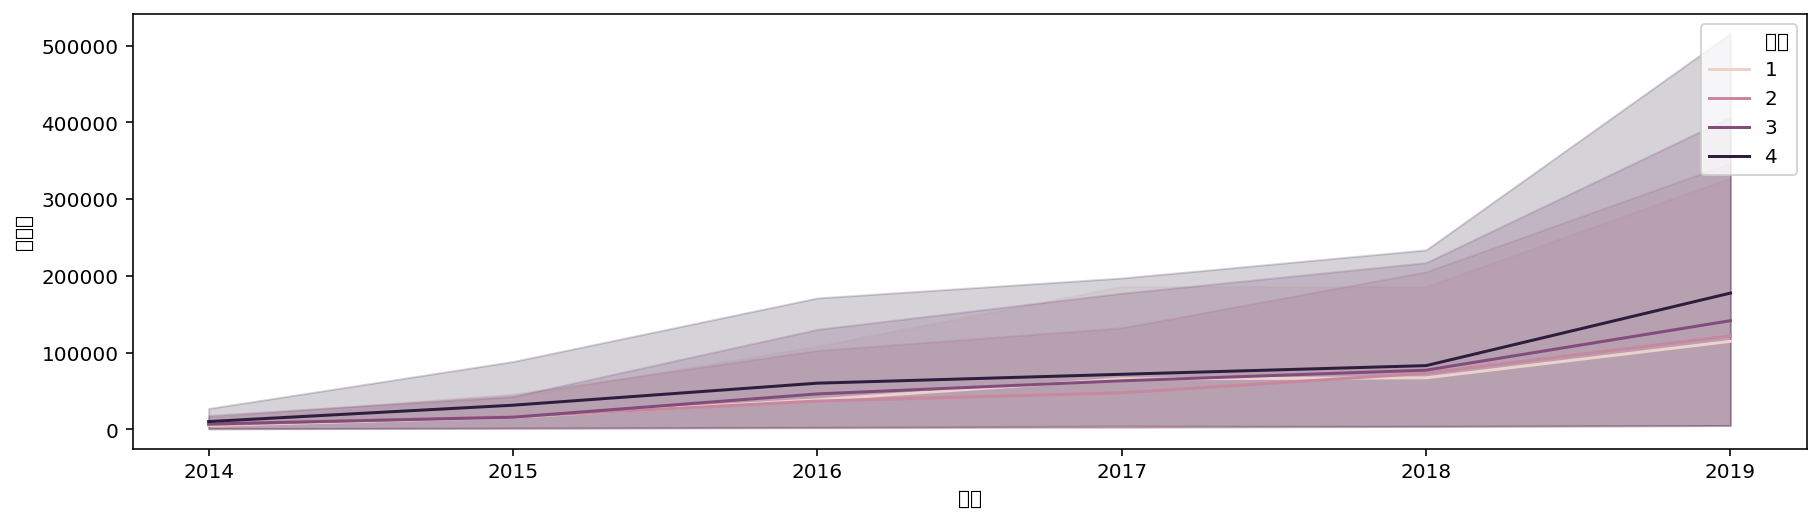

In [47]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

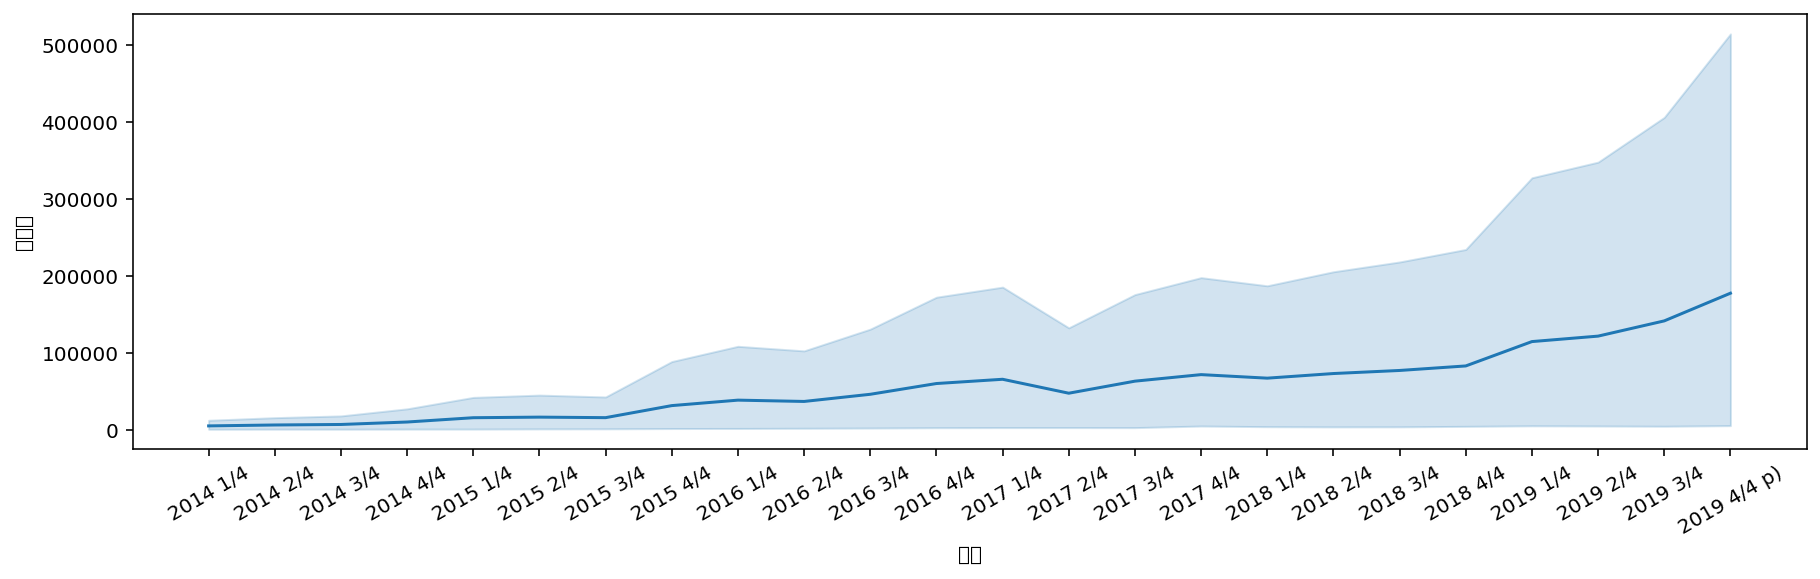

In [48]:
# 기간별 화장품 판매액 데이터 시각화
plt.figure(figsize=(15,4))
# 글자를 겹쳐지지 않게 하기 위해 xticks() 사용하여 글자를 회전시킴
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

In [49]:
# 국가, 대륙별로 출력해보기
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,EU,화장품,계,2014 1/4,937.0,2014,1


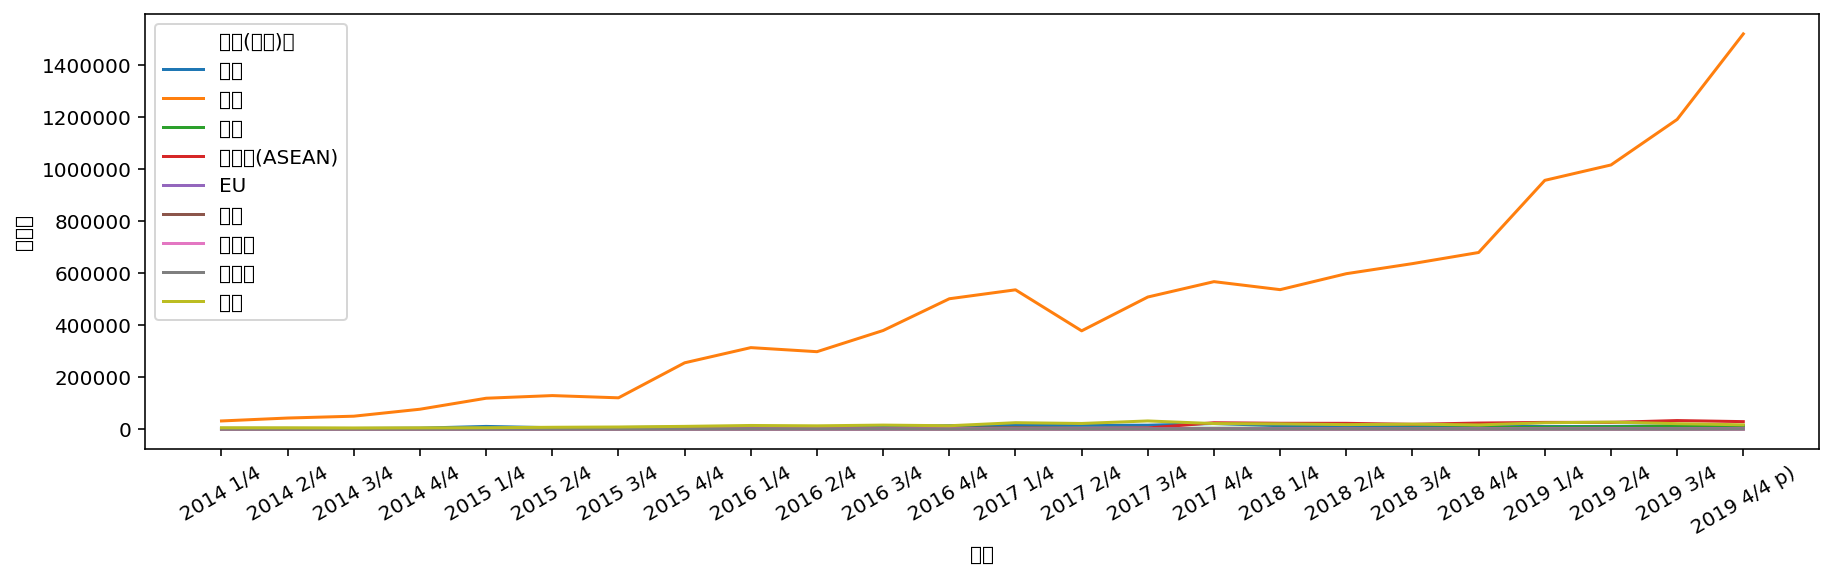

In [50]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic,x="기간",y="백만원", hue="국가(대륙)별")

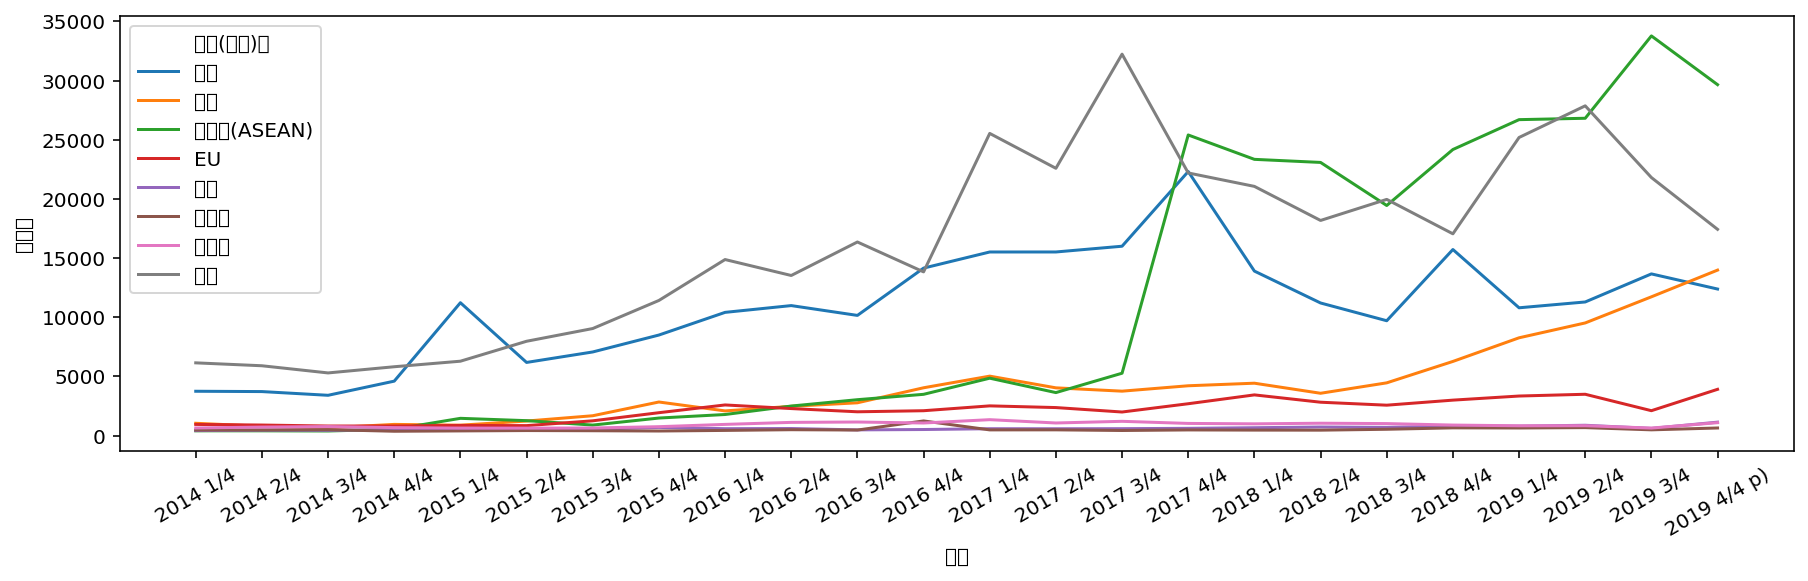

In [51]:
#  중국 빼고 시각화 그래프 그려보기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간", y="백만원", hue="국가(대륙)별")

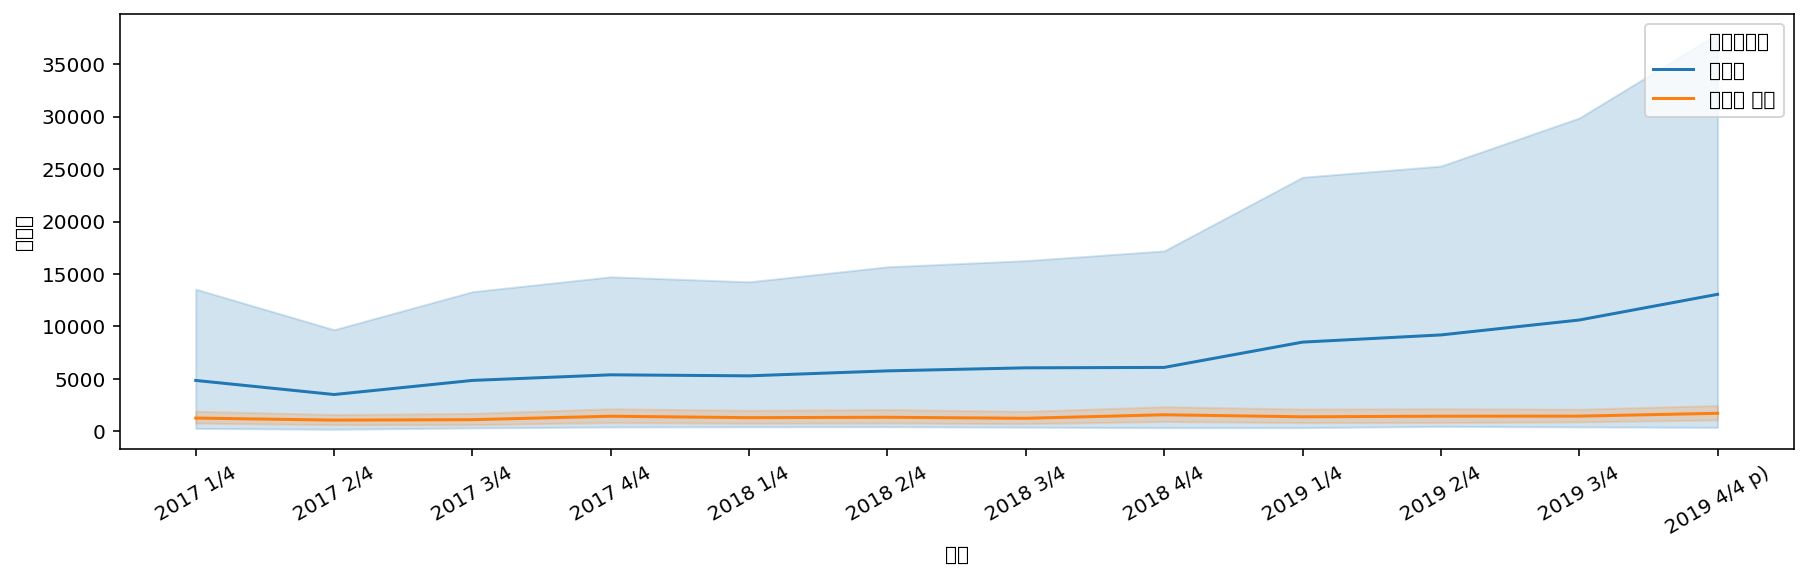

In [52]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sub,x="기간",y="백만원",hue="판매유형별")

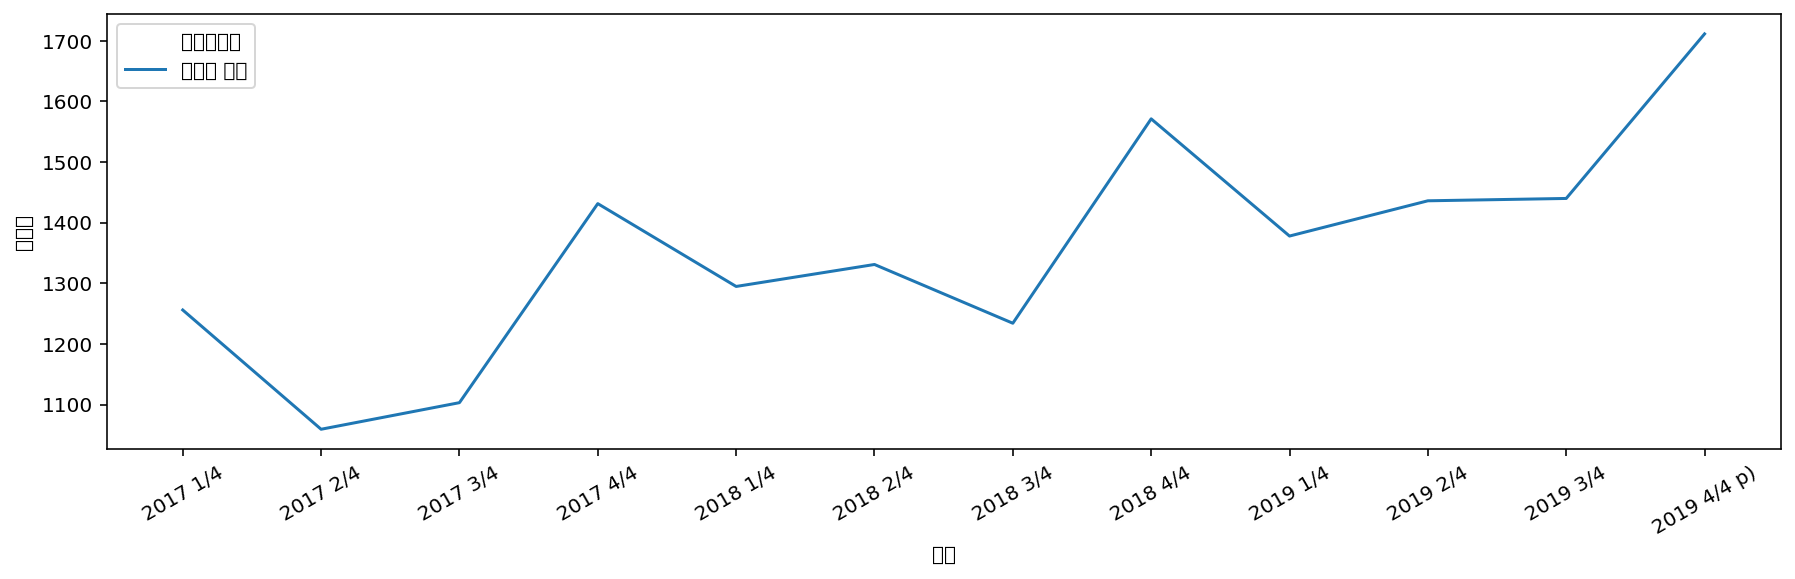

In [53]:
# 온라인 면세점 제외 후 시각화
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub=df[(df["판매유형별"] != "계")&(df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", ci=None)

In [54]:
# 패션 의류 온라인 해외 직접 판매액 시각화
# sns.lineplot()
# plt.figure(), plt.xticks()

df_fashion = df[df["상품군별"]=="의류 및 패션관련 상품"].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
67,미국,의류 및 패션관련 상품,면세점,2014 1/4,NaN,2014,1
68,미국,의류 및 패션관련 상품,면세점 이외,2014 1/4,NaN,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
112,중국,의류 및 패션관련 상품,면세점,2014 1/4,NaN,2014,1


In [55]:
df_fashion = df[(df["상품군별"]=="의류 및 패션관련 상품")&(df["판매유형별"]=="계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1


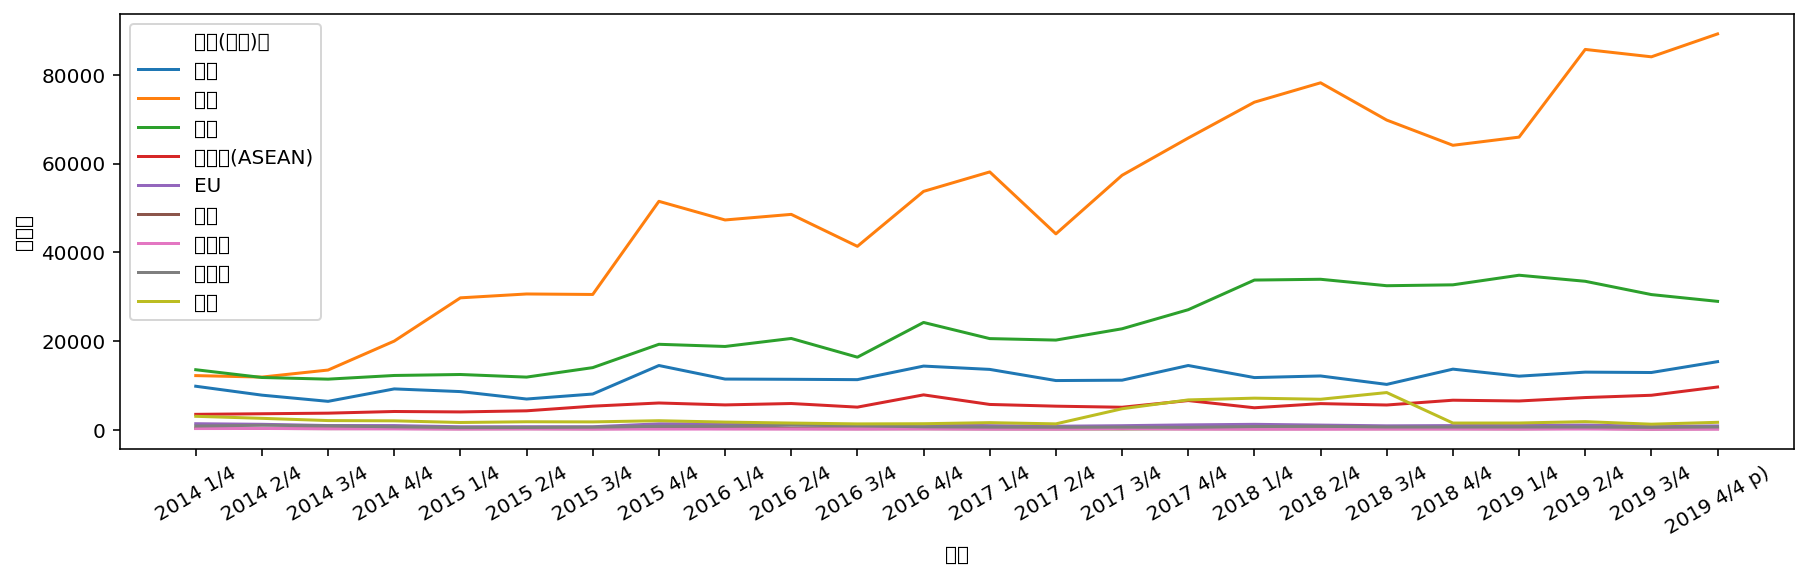

In [56]:
# 기간별 금액 데이터 시각화 & 국가(대륙별) 색상으롤 표시
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

In [57]:
# 계를 제거하고 그리기
df_fashion2= df[(df["상품군별"]=="의류 및 패션관련 상품")&(df["판매유형별"]!="계")].copy()
df_fashion2

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
67,미국,의류 및 패션관련 상품,면세점,2014 1/4,NaN,2014,1
68,미국,의류 및 패션관련 상품,면세점 이외,2014 1/4,NaN,2014,1
112,중국,의류 및 패션관련 상품,면세점,2014 1/4,NaN,2014,1
113,중국,의류 및 패션관련 상품,면세점 이외,2014 1/4,NaN,2014,1
157,일본,의류 및 패션관련 상품,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10688,중남미,의류 및 패션관련 상품,면세점 이외,2019 4/4 p),124.0,2019,4
10732,대양주,의류 및 패션관련 상품,면세점,2019 4/4 p),5.0,2019,4
10733,대양주,의류 및 패션관련 상품,면세점 이외,2019 4/4 p),614.0,2019,4
10777,기타,의류 및 패션관련 상품,면세점,2019 4/4 p),269.0,2019,4


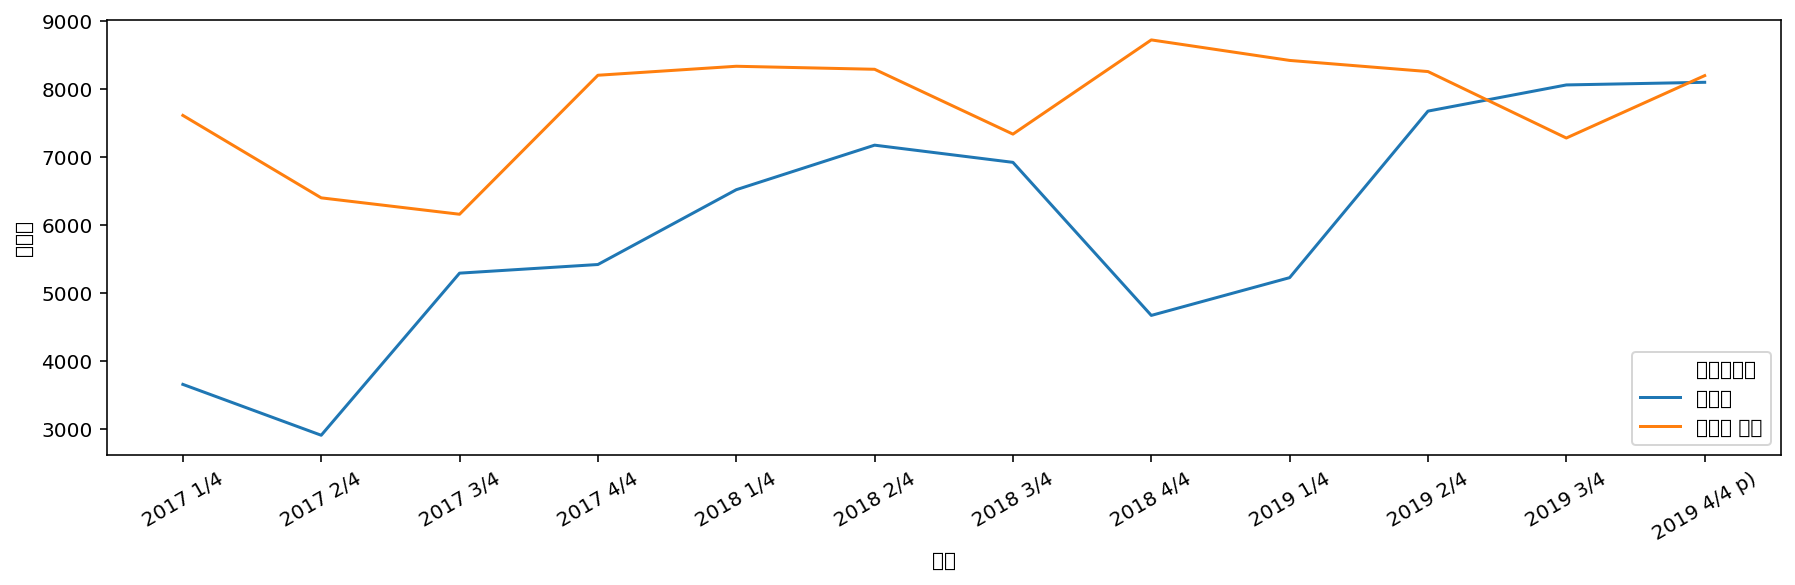

In [58]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)

In [59]:
# 데이터 pivot talbe 로 집계하고 heatmap 으로 표현하기
# df.pivot_table()
# sns.heatmap()

df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
10596,EU,의류 및 패션관련 상품,계,2019 4/4 p),862.0,2019,4
10641,중동,의류 및 패션관련 상품,계,2019 4/4 p),242.0,2019,4
10686,중남미,의류 및 패션관련 상품,계,2019 4/4 p),124.0,2019,4
10731,대양주,의류 및 패션관련 상품,계,2019 4/4 p),619.0,2019,4


In [60]:
# aggfunc 옵션의 기본값이 mean 이기 때문에 평균값이 나옴
df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원")

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,1121.25,843.50,1224.75,934.00,1025.50,923.75
기타,2420.75,1812.00,1479.50,3596.75,5973.25,1568.75
대양주,848.00,587.25,850.25,566.50,680.25,595.25
미국,8305.75,9516.50,12112.75,12588.25,11943.50,13331.00
아세안(ASEAN),3734.00,4909.75,6119.50,5667.75,5771.50,7788.75
일본,12240.00,14398.50,19976.25,22646.00,33202.00,31930.50
중국,14382.75,35584.75,47733.00,56351.75,71499.50,81254.50
중남미,243.75,154.00,162.25,190.50,144.00,135.75
중동,293.00,254.50,242.00,193.00,219.75,231.00


In [61]:
# aggfunc 의 값을 sum으로 하여 합계값 알아보기
df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,4485.0,3374.0,4899.0,3736.0,4102.0,3695.0
기타,9683.0,7248.0,5918.0,14387.0,23893.0,6275.0
대양주,3392.0,2349.0,3401.0,2266.0,2721.0,2381.0
미국,33223.0,38066.0,48451.0,50353.0,47774.0,53324.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23086.0,31155.0
일본,48960.0,57594.0,79905.0,90584.0,132808.0,127722.0
중국,57531.0,142339.0,190932.0,225407.0,285998.0,325018.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


In [62]:
df_fashion["판매유형별"].value_counts()

계    216
Name: 판매유형별, dtype: int64

In [63]:
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,4485.0,3374.0,4899.0,3736.0,4102.0,3695.0
기타,9683.0,7248.0,5918.0,14387.0,23893.0,6275.0
대양주,3392.0,2349.0,3401.0,2266.0,2721.0,2381.0
미국,33223.0,38066.0,48451.0,50353.0,47774.0,53324.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23086.0,31155.0
일본,48960.0,57594.0,79905.0,90584.0,132808.0,127722.0
중국,57531.0,142339.0,190932.0,225407.0,285998.0,325018.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


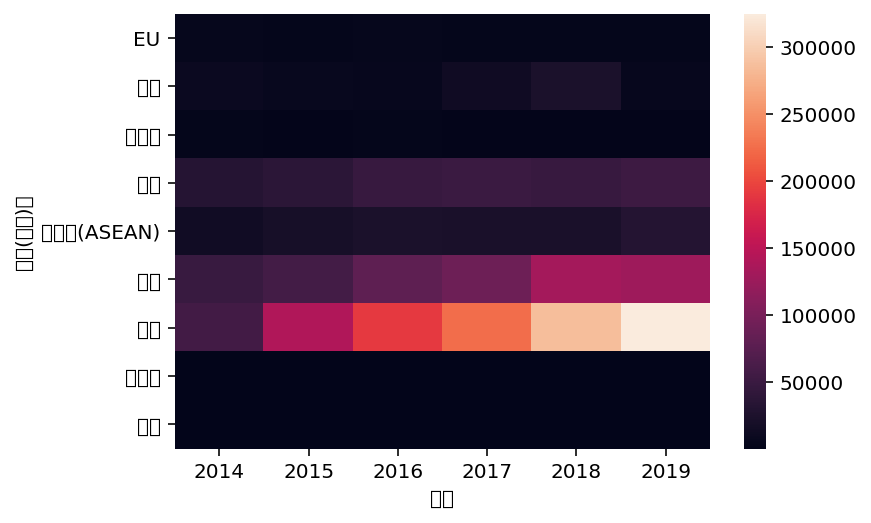

In [64]:
sns.heatmap(result)

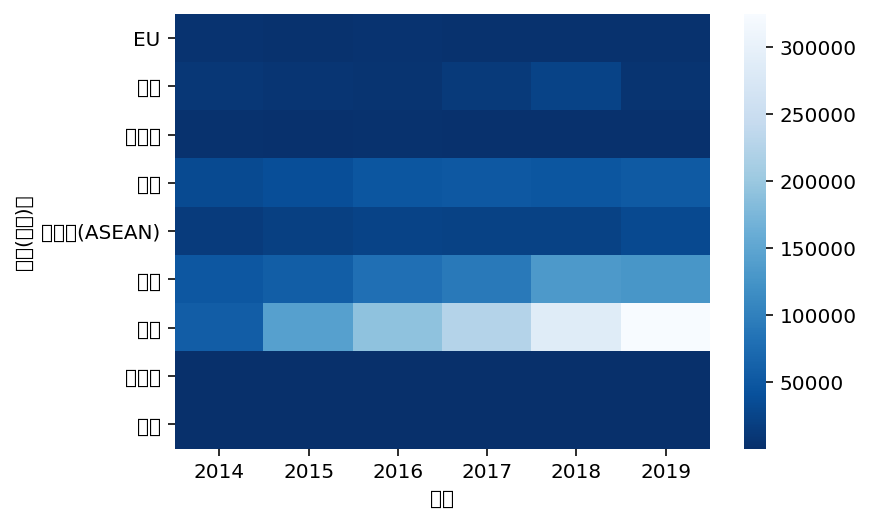

In [65]:
sns.heatmap(result, cmap="Blues_r")

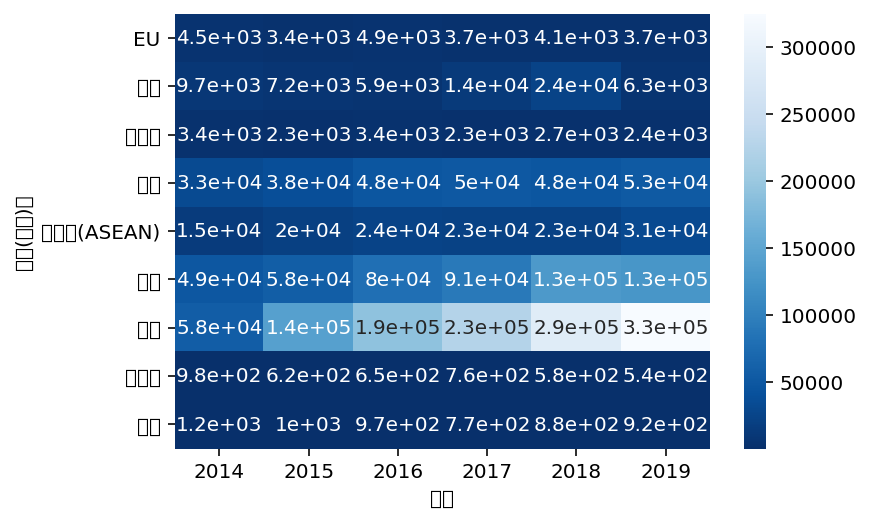

In [66]:
sns.heatmap(result,cmap="Blues_r",annot=True)

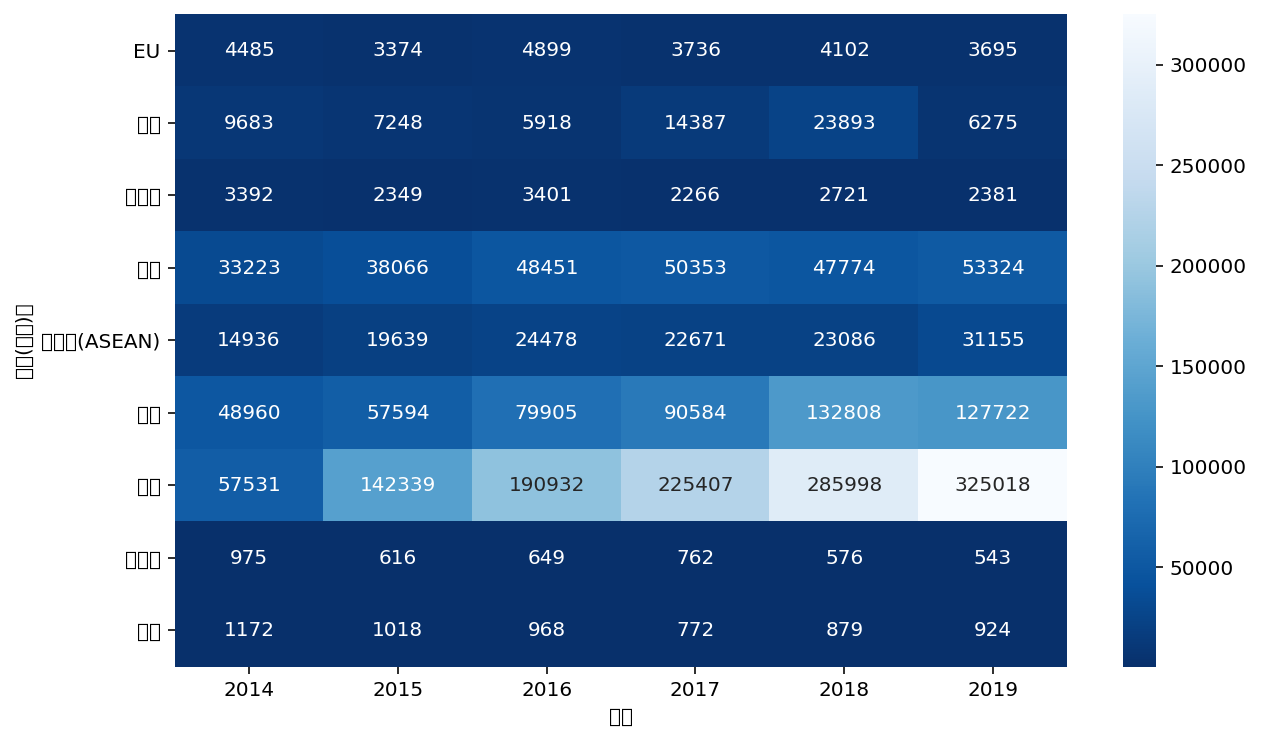

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(result, cmap="Blues_r", annot=True, fmt=".0f")

In [68]:
# 전체상품군별 시각화
# sns.barplot(), sns.lineplot(), plt.legend()
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4 p),192.0,2019,4
10788,기타,음·식료품,계,2019 4/4 p),315.0,2019,4
10791,기타,농축수산물,계,2019 4/4 p),2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4 p),531.0,2019,4


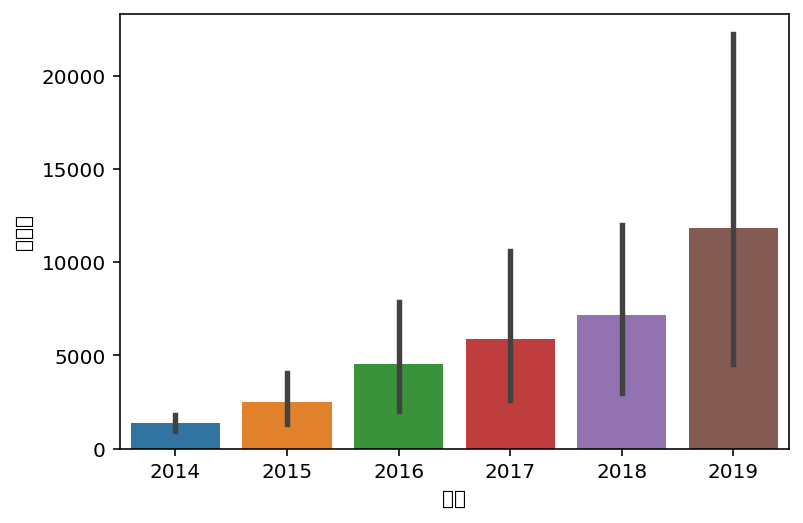

In [69]:
# estimator 옵션은 기본으로 mean 값을 구함
sns.barplot(data=df_total,x="연도",y="백만원")

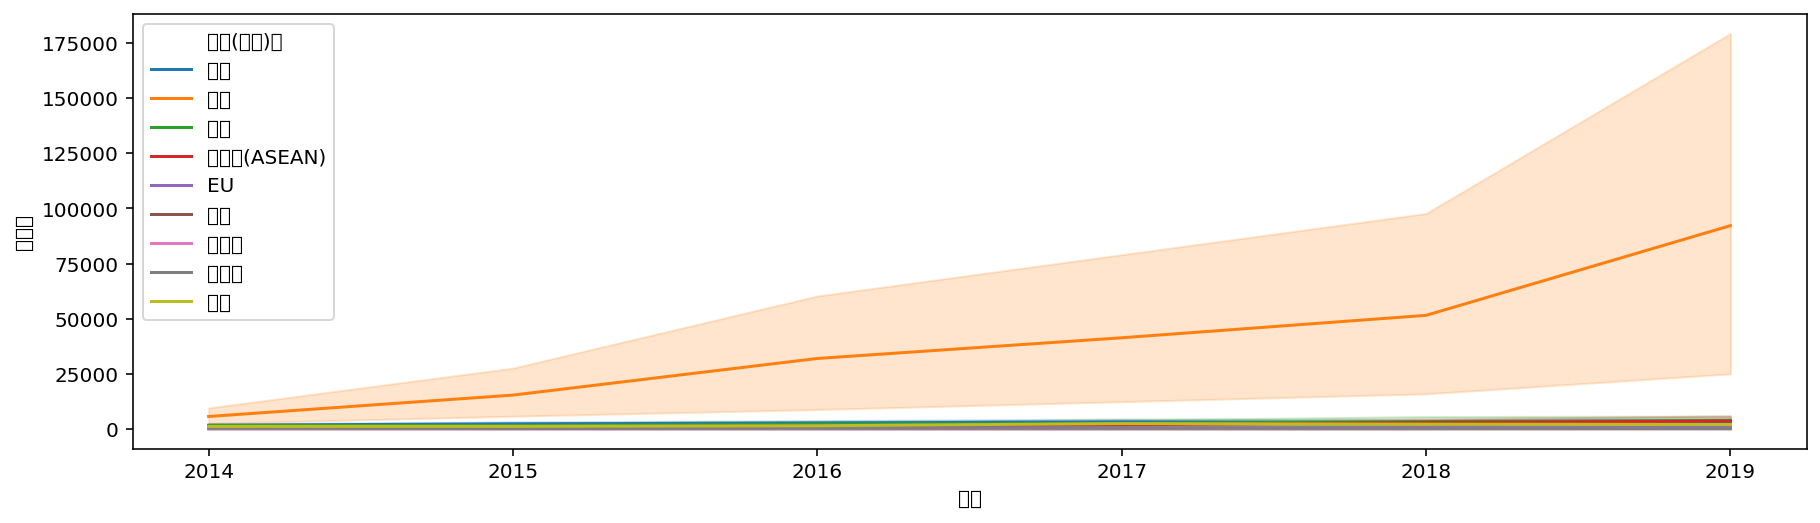

In [70]:
# lineplot 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

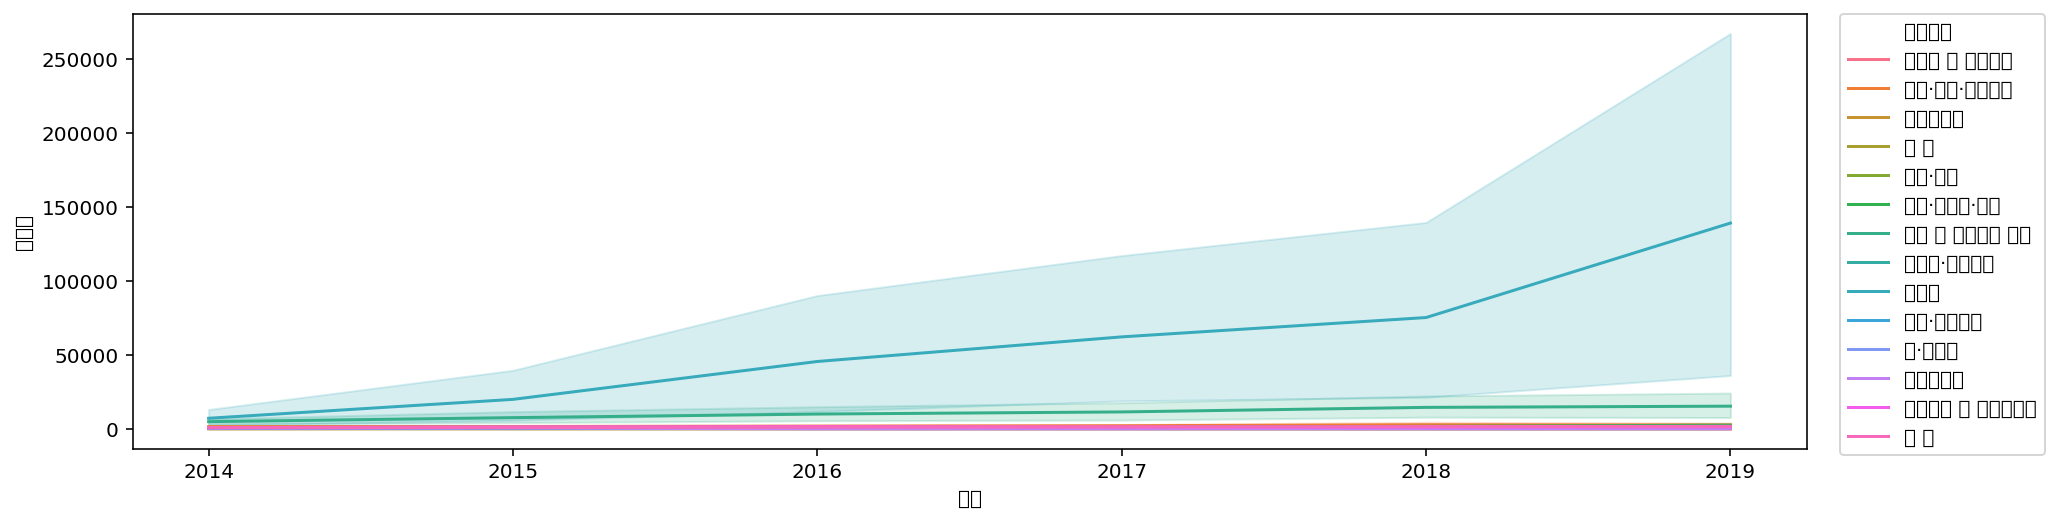

In [71]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total,x="연도",y="백만원",hue="상품군별")
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0,)